In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pandas import get_dummies
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', rc={'figure.facecolor':'#abb2bf'})

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'



<h1>Load data</h1>

In [2]:
file_name = "iris.data.csv"

In [3]:
#load the dataset into memory
dataset = pd.read_csv(file_name,header=None,\
                      names=['sepal_length','sepal_width','petal_length','petal_width','species'])
#check several examples of data
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<h1>Data preprocessing</h1>

In [4]:
#simple function to process the data.
"""
input:
    data: iris dataset
    num_features: 2 => select only petal width and petal width.
                  4 => select all features
    flower: 'Iris-setosa' => labels of Iris-setosa will be 1 and others will be 0
            'Iris-virginica' => labels of Iris-virginica will be 1 and others will be 0
            'None' => use one-hot encoding to represent the labels

return:
    x: normalized & shuffled data
    y: labels
"""
def data_preprocessing(data,num_features,flower=None):
    if num_features==2:
        features = data.columns[2:4]
    else:
        features = data.columns[0:4]
    labels = dataset.columns[4]
    print(features)
    print(labels)
    #normalize the data
    data_norm = pd.DataFrame(data)
    for feature in features:
        data[feature] = (data[feature]-data[feature].mean())/data[feature].std()

    #shuffle the data
    indices = data_norm.index.tolist()
    indices = np.array(indices)
    np.random.shuffle(indices)
    x = data_norm.reindex(indices)[features]
    y = data_norm.reindex(indices)[labels]
    if flower=='Iris-setosa':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-setosa' else 0
        y = y.values.reshape(len(y),1)
    elif flower=='Iris-virginica':
        for i in range(len(y)):
            y[i]=1 if y[i]=='Iris-virginica' else 0
        y = y.values.reshape(len(y),1)
    else:
        y = get_dummies(y)
    return x,y

<h1>Part a:

In [5]:
x_1,y_1 = data_preprocessing(dataset,2,flower='Iris-setosa')
#generate traning and validation sets
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size=0.3)

Index([u'petal_length', u'petal_width'], dtype='object')
species


<h2>Define hyper-parameters</h2>

In [6]:
# Define number of iterations
num_iter = 100

# Define learning rate
lr = 0.005

num_inputs = 2
num_classes = 1

<h2>Define Placeholder and Variables</h2>

In [7]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None,None],name='X')
Y = tf.placeholder(tf.float32, shape=[None,None],name='Y')

# Define the weight
W = tf.Variable(tf.random_normal([num_inputs,num_classes]),tf.float32,name='W')

# Define the bias
b = tf.Variable(tf.zeros(shape=[num_classes]),tf.float32,name='bias')

Instructions for updating:
Colocations handled automatically by placer.


<h2>Define update rule and accuracy</h2>

In [8]:

# Define the predicted output
Y_hat = tf.add(tf.matmul(X,W),b,'Y_hat')

#define the loss function, we are using cross entropy function after sigmoid on Y_hat
loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits=Y_hat,labels=Y),name='loss')

#define the optimizer, here we use standard gradient descent method
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(loss)

#initialize tensorflow variables
init = tf.global_variables_initializer()

# Compare the predicted labels with true labels
#correct_pred = tf.equal(tf.argmax(Y_hat,1), tf.argmax(Y,1))
correct_pred = tf.equal(tf.cast(Y_hat>0, tf.float32), Y)

# Compute the accuracy by taking the average
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32),name='accuracy')

<h2>Execute training</h2>

In [9]:
t_acc_1 = []
#start tensorflow session
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(num_iter):      
        #every iteration we run optimization on the training data X and labels Y
        sess.run(optimizer,feed_dict = {X:x_train_1,Y:y_train_1})
        
        if i % 5 == 0:
            curr_loss = sess.run(loss, feed_dict={X:x_train_1,Y:y_train_1})
            acc = sess.run(accuracy, feed_dict={X:x_train_1,Y:y_train_1})
            
            pred = sess.run(Y_hat, feed_dict={X:x_train_1,Y:y_train_1})
            lab = sess.run(Y, feed_dict={X:x_train_1,Y:y_train_1})
            t_acc_1.append(acc)
            print("step " + str(i) + ", Loss = " + str(curr_loss) + " Accuracy = " + str(acc))
                
        
    #after training, we acquire the weight and bias
    #np.squeeze plays a role to get rid of the redundant dimension [i.e.make (2,1) be (2,)]
    W = np.squeeze(sess.run(W))
    b = np.squeeze(sess.run(b))
    
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={X:x_test_1, Y:y_test_1}))
    

step 0, Loss = 16.764017 Accuracy = 0.95238096
step 5, Loss = 13.375131 Accuracy = 0.96190476
step 10, Loss = 11.185388 Accuracy = 0.9809524
step 15, Loss = 9.660098 Accuracy = 0.9809524
step 20, Loss = 8.539667 Accuracy = 0.9809524
step 25, Loss = 7.682877 Accuracy = 0.9904762
step 30, Loss = 7.0065274 Accuracy = 0.9904762
step 35, Loss = 6.458598 Accuracy = 0.9904762
step 40, Loss = 6.0050383 Accuracy = 0.9904762
step 45, Loss = 5.6227164 Accuracy = 0.9904762
step 50, Loss = 5.2954264 Accuracy = 0.9904762
step 55, Loss = 5.011519 Accuracy = 0.9904762
step 60, Loss = 4.7624197 Accuracy = 0.9904762
step 65, Loss = 4.541697 Accuracy = 1.0
step 70, Loss = 4.344431 Accuracy = 1.0
step 75, Loss = 4.1668005 Accuracy = 1.0
step 80, Loss = 4.0057926 Accuracy = 1.0
step 85, Loss = 3.8589985 Accuracy = 1.0
step 90, Loss = 3.7244704 Accuracy = 1.0
step 95, Loss = 3.6006114 Accuracy = 1.0
('Testing Accuracy:', 1.0)


<h2>Plot</h2>

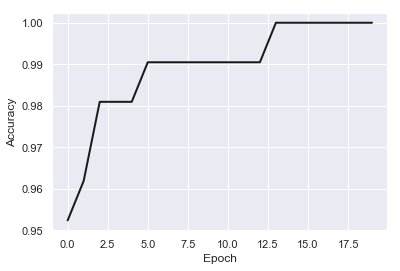

In [10]:
#plot out the decision line determined by learned weight and bias
#plt.xlim([0, len(t_acc)]); plt.ylim([0, 1.1]);
plt.plot(t_acc_1, color='k', linewidth=2)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [11]:
plot_df = pd.concat(
    [
        x_train_1.reset_index(drop=True), 
        pd.DataFrame(y_train_1.flatten())
    ],
    axis=1
).rename({0: 'label'}, axis=1)

plot_df.head()

,petal_length,petal_width,label
0,0.986915,0.787951,0
1,1.100267,1.705189,0
2,1.213619,1.181053,0
3,1.043591,0.787951,0
4,-1.280118,-1.308593,1


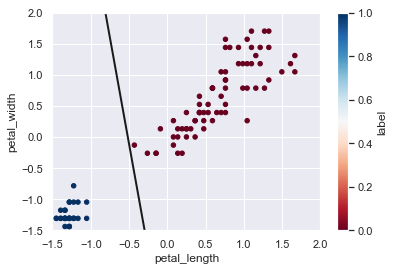

In [12]:
# calculate decision line
plot_x = np.array([np.min(x_train_1.values[:, 0] - 0.2), np.max(x_train_1.values[:, 1]+0.2)])
plot_y = 1 / W[1] * (-W[0] * plot_x - b)

# plot dataframe
(plot_df
 .plot
 .scatter(
     x='petal_length',
     y='petal_width', 
     c='label',
     colormap='RdBu',
     sharex=False
 )
)

# plot decision line
plt.plot(plot_x, plot_y, color='k', linewidth=2)

# adjust axes
plt.xlim([-1.5, 2.0]);
plt.ylim([-1.5, 2.0]);

<p style="font-size:15px">I am getting very high accuracy after very few iterations. For instance, after the first iteration the accuracy was already at 95%. These results tell me that it is very easy to distiguish between setosa and non-setosa.</p>

<h1>Part b:</h1>

In [13]:
x_2,y_2 = data_preprocessing(dataset,2,flower='Iris-virginica')
#generate traning and validation sets
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(x_2,y_2,test_size=0.3)

Index([u'petal_length', u'petal_width'], dtype='object')
species


<h2>Define hyper-parameter</h2>

In [14]:
# Define number of iterations
num_iter = 100

# Define learning rate
lr = 0.005

num_inputs = 2
num_classes = 1

<h2>Define Placeholder and Variables</h2>

In [15]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None,None],name='X')
Y = tf.placeholder(tf.float32, shape=[None,None],name='Y')

# Define the weight
W = tf.Variable(tf.random_normal([num_inputs,num_classes]),tf.float32,name='W')

# Define the bias
b = tf.Variable(tf.zeros(shape=[num_classes]),tf.float32,name='bias')

<h2>Define update rule and accuracy</h2>

In [16]:

# Define the predicted output
Y_hat = tf.add(tf.matmul(X,W),b,'Y_hat')

#define the loss function, we are using cross entropy function after sigmoid on Y_hat
loss = tf.reduce_sum(tf.nn.sigmoid_cross_entropy_with_logits(logits=Y_hat,labels=Y),name='loss')

#define the optimizer, here we use standard gradient descent method
optimizer = tf.train.GradientDescentOptimizer(lr).minimize(loss)

#initialize tensorflow variables
init = tf.global_variables_initializer()

# Compare the predicted labels with true labels
#correct_pred = tf.equal(tf.argmax(Y_hat,1), tf.argmax(Y,1))
correct_pred = tf.equal(tf.cast(Y_hat>0, tf.float32), Y)

# Compute the accuracy by taking the average
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32),name='accuracy')

<h2>Execute training</h2>

In [17]:
t_acc_2 = []
#start tensorflow session
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(num_iter):      
        #every iteration we run optimization on the training data X and labels Y
        sess.run(optimizer,feed_dict = {X:x_train_2,Y:y_train_2})
        
        if i % 5 == 0:
            curr_loss = sess.run(loss, feed_dict={X:x_train_2,Y:y_train_2})
            acc = sess.run(accuracy, feed_dict={X:x_train_2,Y:y_train_2})
            
            pred = sess.run(Y_hat, feed_dict={X:x_train_2,Y:y_train_2})
            lab = sess.run(Y, feed_dict={X:x_train_2,Y:y_train_2})
            t_acc_2.append(acc)
            print("step " + str(i) + ", Loss = " + str(curr_loss) + " Accuracy = " + str(acc))
                
        
    #after training, we acquire the weight and bias
    #np.squeeze plays a role to get rid of the redundant dimension [i.e.make (2,1) be (2,)]
    W = np.squeeze(sess.run(W))
    b = np.squeeze(sess.run(b))
    
    print("Testing Accuracy:", sess.run(accuracy, feed_dict={X:x_test_2, Y:y_test_2}))

step 0, Loss = 123.060234 Accuracy = 0.30476192
step 5, Loss = 46.41834 Accuracy = 0.93333334
step 10, Loss = 36.191956 Accuracy = 0.8952381
step 15, Loss = 31.804838 Accuracy = 0.94285715
step 20, Loss = 29.026142 Accuracy = 0.94285715
step 25, Loss = 27.005882 Accuracy = 0.95238096
step 30, Loss = 25.432323 Accuracy = 0.96190476
step 35, Loss = 24.153685 Accuracy = 0.9714286
step 40, Loss = 23.084055 Accuracy = 0.9714286
step 45, Loss = 22.170042 Accuracy = 0.96190476
step 50, Loss = 21.376192 Accuracy = 0.95238096
step 55, Loss = 20.67779 Accuracy = 0.95238096
step 60, Loss = 20.056898 Accuracy = 0.95238096
step 65, Loss = 19.500103 Accuracy = 0.95238096
step 70, Loss = 18.997103 Accuracy = 0.95238096
step 75, Loss = 18.539818 Accuracy = 0.95238096
step 80, Loss = 18.121807 Accuracy = 0.95238096
step 85, Loss = 17.737833 Accuracy = 0.95238096
step 90, Loss = 17.383614 Accuracy = 0.95238096
step 95, Loss = 17.055578 Accuracy = 0.95238096
('Testing Accuracy:', 0.95555556)


<h2>Plot</h2>

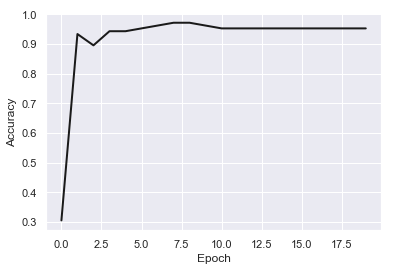

In [18]:
#plot out the decision line determined by learned weight and bias
#plt.xlim([0, len(t_acc)]); plt.ylim([0, 1.1]);
plt.plot(t_acc_2, color='k', linewidth=2)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

In [19]:
plot_df = pd.concat(
    [
        x_train_2.reset_index(drop=True), 
        pd.DataFrame(y_train_2.flatten())
    ],
    axis=1
).rename({0: 'label'}, axis=1)

plot_df.head()

,petal_length,petal_width,label
0,-1.053415,-1.308593,0
1,0.476833,0.132781,0
2,1.326970,1.705189,1
3,1.156943,1.312087,1
4,-1.166767,-1.308593,0


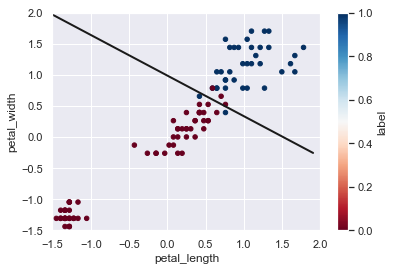

In [20]:
# calculate decision line
plot_x = np.array([np.min(x_train_1.values[:, 0] - 0.2), np.max(x_train_1.values[:, 1]+0.2)])
plot_y = 1 / W[1] * (-W[0] * plot_x - b)

# plot dataframe
(plot_df
 .plot
 .scatter(
     x='petal_length',
     y='petal_width', 
     c='label',
     colormap='RdBu',
     sharex=False
 )
)

# plot decision line
plt.plot(plot_x, plot_y, color='k', linewidth=2)

# adjust axes
plt.xlim([-1.5, 2.0]);
plt.ylim([-1.5, 2.0]);

<p style="font-size:15px"> Classification of virginica vs. non-virginica has high accuracy, but it does not perform as well as the previous implementation. After the first iteration the  accuracy is only 30% and reaches 97% after 35 iterations. These results tell me that the petal width and length of virginica are not as consistent in comparison to setosa and this is the reason why it does not reach the same accuracy in comparison to classifying setosa vs. non-setosa. If we used all four features for this classification, it could be improved.</p>

<h1>Part c:</h1>

In [21]:
x_3,y_3 = data_preprocessing(dataset,4)
#generate traning and validation sets
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(x_3,y_3,test_size=0.3)
x_train_3.head()

Index([u'sepal_length', u'sepal_width', u'petal_length', u'petal_width'], dtype='object')
species


,sepal_length,sepal_width,petal_length,petal_width
138,0.189196,-0.124540,0.590184,0.787951
24,-1.259964,0.797981,-1.053415,-1.308593
56,0.551486,0.567351,0.533509,0.525883
70,0.068433,0.336720,0.590184,0.787951
103,0.551486,-0.355171,1.043591,0.787951


<h2>Define hyper-parameters</h2>

In [22]:
lr = 0.01
num_iter = 100
# Network parameters
n_hidden_1 = 256
n_hidden_2 = 128

n_features = 4
n_labels = 3

<h2>Define placehoder and variables</h2>

In [23]:
tf.reset_default_graph()

X = tf.placeholder(tf.float32, shape=[None,n_features],name='X')
Y = tf.placeholder(tf.float32, shape=[None,n_labels],name='Y')

# Define the weights
W1 = tf.Variable(tf.random_normal([n_features,n_hidden_1]),tf.float32,name='W1')
W2 = tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2]),tf.float32,name='W2')
Wout = tf.Variable(tf.random_normal([n_hidden_2,n_labels]),tf.float32,name='Wout')

# Define the biases
b1 = tf.Variable(tf.zeros(shape=[n_hidden_1]),tf.float32,name='b1')
b2 = tf.Variable(tf.zeros(shape=[n_hidden_2]),tf.float32,name='b2')
bout = tf.Variable(tf.zeros(shape=[n_labels]),tf.float32,name='bout')

<h2>Define the neural network</h2>

In [24]:
# Hidden layer 1
l1 = tf.add(tf.matmul(X, W1), b1)
rel_1 = tf.nn.relu(l1)

# Hidd layer 2
l2 = tf.add(tf.matmul(rel_1, W2), b2)
rel_2 = tf.nn.relu(l2)

# Output layer
logits = tf.add(tf.matmul(rel_2, Wout), bout)
#logits = tf.nn.softmax(out)


<h2>Define cost function and accuracy</h2>

In [25]:
# Define Loss
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logits,labels=Y),name='loss')

# Define optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=lr)
train_op = optimizer.minimize(loss)

#initialize tensorflow variables
init = tf.global_variables_initializer()


pred_out = tf.nn.softmax(logits)
# Compare the predicted labels with true labels
correct_pred = tf.equal(tf.argmax(pred_out,1), tf.argmax(Y,1))
#correct_pred = tf.equal(tf.cast(pred_out>0, tf.float32), Y)

# Compute the accuracy by taking the average
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32),name='accuracy')

<h2>Execute training</h2>

In [26]:
t_acc_3 = []
#start tensorflow session
with tf.Session() as sess:
    #run initialization
    sess.run(init)
    #training for number of iterations
    for i in range(num_iter):      
        #every iteration we run optimization on the training data X and labels Y
        sess.run(train_op,feed_dict = {X:x_train_3,Y:y_train_3})
        if i % 5 == 0:
            curr_loss = sess.run(loss, feed_dict={X:x_train_3,Y:y_train_3})
            acc = sess.run(accuracy, feed_dict={X:x_train_3,Y:y_train_3})
            t_acc_3.append(acc)
            print("step " + str(i) + ", Loss = " + str(curr_loss) + " Accuracy = " + str(acc))
    
    #after training, we acquire the weight and bias
    #np.squeeze plays a role to get rid of the redundant dimension [i.e.make (2,1) be (2,)]
    W = np.squeeze(sess.run(Wout))
    b = np.squeeze(sess.run(bout))

step 0, Loss = 111.54342 Accuracy = 0.61904764
step 5, Loss = 2.2568104 Accuracy = 0.9047619
step 10, Loss = 0.8379403 Accuracy = 0.93333334
step 15, Loss = 0.19640432 Accuracy = 0.9714286
step 20, Loss = 0.043163735 Accuracy = 0.9809524
step 25, Loss = 0.17478569 Accuracy = 0.9714286
step 30, Loss = 0.0014692543 Accuracy = 1.0
step 35, Loss = 0.00089718925 Accuracy = 1.0
step 40, Loss = 0.0006553374 Accuracy = 1.0
step 45, Loss = 0.00052800274 Accuracy = 1.0
step 50, Loss = 0.00046038488 Accuracy = 1.0
step 55, Loss = 0.0004089219 Accuracy = 1.0
step 60, Loss = 0.0003682186 Accuracy = 1.0
step 65, Loss = 0.00033519205 Accuracy = 1.0
step 70, Loss = 0.00030758753 Accuracy = 1.0
step 75, Loss = 0.0002841221 Accuracy = 1.0
step 80, Loss = 0.00026432215 Accuracy = 1.0
step 85, Loss = 0.00024713305 Accuracy = 1.0
step 90, Loss = 0.00023211374 Accuracy = 1.0
step 95, Loss = 0.00021883278 Accuracy = 1.0


<h2>Plot</h2>

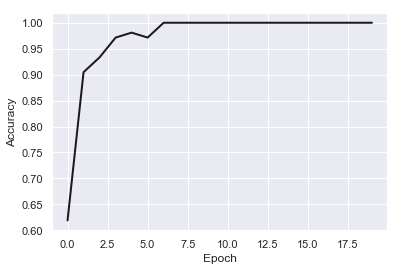

In [27]:
# Plot accuracy vs. epoch
plt.plot(t_acc_3, color='k', linewidth=2)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()